In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

In [2]:
x_data = [[73, 80, 75],
          [93, 88, 93],
          [89, 91, 90],
          [96, 98, 100],
          [73, 66, 70]]

y_data = [[152], [185], [180], [196], [142]]

In [3]:
class CustomDataset(Dataset):
  def __init__(self):
    self.x_data = x_data
    self.y_data = y_data

  def __len__(self):
    return len(self.x_data)

  def __getitem__(self, idx):
    X = torch.FloatTensor(self.x_data[idx])
    y = torch.FloatTensor(self.y_data[idx])
    return X, y

In [18]:
dataset = CustomDataset()
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

for i in range(dataset.__len__()):
  for data in dataset.__getitem__(i):
    print(data)
    print()

tensor([73., 80., 75.])

tensor([152.])

tensor([93., 88., 93.])

tensor([185.])

tensor([89., 91., 90.])

tensor([180.])

tensor([ 96.,  98., 100.])

tensor([196.])

tensor([73., 66., 70.])

tensor([142.])



In [ ]:
from sklearn.datasets import load_boston
boston = load_boston()

In [27]:
import numpy as np

np.random.seed(0)
torch.manual_seed(0)

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X = boston.data
y = boston.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=157)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train.shape, X_test.shape

((379, 13), (127, 13))

In [59]:
X_train[:3]

array([[-0.31528257, -0.4807241 , -0.18802512, -0.28784917, -0.09380862,
        -0.22053159, -0.55465558, -0.54411125, -0.62545771, -0.61737219,
        -0.00376846,  0.45001143, -0.93169644],
       [-0.40118308,  0.94910142, -1.31874187, -0.28784917, -0.70889094,
         1.35474311, -0.96529925,  0.12217388, -0.27582869, -1.10946486,
        -0.00376846,  0.41386612, -0.8014971 ],
       [-0.30808233, -0.4807241 , -0.4458051 , -0.28784917, -0.14506548,
        -0.44254068,  0.72290252,  0.11749633, -0.62545771, -0.5993688 ,
         1.1941159 ,  0.40095708,  0.14416128]])

In [60]:
y_train.shape

(379,)

In [67]:
class make_dataset(Dataset):
  def __init__(self, X, y):
    self.X = X.astype(np.float32)
    self.y = y.astype(np.float32)

  def __len__(self):
    return len(self.X)

  def __getitem__(self, idx):
    X = self.X[idx]
    y = self.y[idx]
    return X, y

In [52]:
# hyperparameter
lr = 0.001
epochs  = 200
batch_size = 32

In [68]:
train_dataset = make_dataset(X_train, y_train)
test_dataset = make_dataset(X_test, y_test)

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size)

In [86]:
class create_model(nn.Module):
  def __init__(self):
    super(create_model, self).__init__()
    self.linear1 = nn.Sequential(nn.Linear(13, 64), nn.ReLU(), nn.Linear(64, 32))
    self.linear2 = nn.Sequential(nn.Linear(32, 16), nn.ReLU(), nn.Linear(16, 8))
    self.linear3 = nn.Sequential(nn.Linear(8, 4), nn.ReLU(), nn.Linear(4, 1))

  def forward(self, x):
    out = self.linear1(x)
    out = self.linear2(out)
    out = self.linear3(out)
    return out

model = create_model()
optimizer = torch.optim.Adam(model.parameters(), lr=lr) 
criterion = nn.MSELoss()

In [87]:
all_losses = []

for epoch in range(epochs + 1):
  losses = []
  total = 0

  for X_train, y_train in train_dataloader:
    # print(type(X_train))
    prediction = model(X_train)
    
    optimizer.zero_grad()
    cost = criterion(prediction, torch.unsqueeze(y_train,dim=1))
    cost.backward()
    optimizer.step()

    
    losses.append(cost.item())
    total += 1
    
  epoch_loss = sum(losses) / total
  all_losses.append(epoch_loss)
  
  if epoch%10 == 0:
    print(f"Epoch #{epoch}\tLoss: {all_losses[-1]:.3f}")

Epoch #0	Loss: 607.795
Epoch #10	Loss: 37.042
Epoch #20	Loss: 17.530
Epoch #30	Loss: 13.170
Epoch #40	Loss: 11.059
Epoch #50	Loss: 9.917
Epoch #60	Loss: 9.281
Epoch #70	Loss: 8.894
Epoch #80	Loss: 8.399
Epoch #90	Loss: 8.189
Epoch #100	Loss: 7.848
Epoch #110	Loss: 7.573
Epoch #120	Loss: 7.413
Epoch #130	Loss: 7.258
Epoch #140	Loss: 7.223
Epoch #150	Loss: 6.895
Epoch #160	Loss: 7.024
Epoch #170	Loss: 6.608
Epoch #180	Loss: 6.337
Epoch #190	Loss: 6.253
Epoch #200	Loss: 6.071


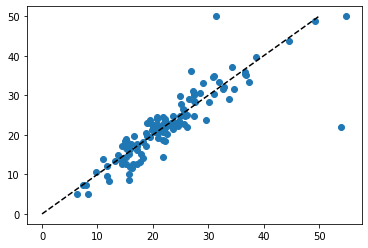

In [88]:
import matplotlib.pyplot as plt

y_pred = []
y_true = []
model.eval()

with torch.no_grad():  
  for X_test, y_test in test_dataloader:
      y_pred.extend(model(X_test).data.numpy())
      y_true.extend(y_test.numpy())

plt.scatter(y_pred, y_true)
plt.plot([0, 50], [0, 50], '--k')